This Project is used to calculate the Fleiss Kappa score between reviews done by any two reviewers.

In [4]:
def checkInput(rate, n):
    """ 
    Check correctness of the input matrix
    @param rate - ratings matrix
    @return n - number of raters
    @throws AssertionError 
    """
    N = len(rate)
    k = len(rate[0])
    assert all(len(rate[i]) == k for i in range(k)), "Row length != #categories)"
    assert all(isinstance(rate[i][j], int) for i in range(N) for j in range(k)), "Element not integer" 
    assert all(sum(row) == n for row in rate), "Sum of ratings != #raters)"

def fleissKappa(rate,n):
    """ 
    Computes the Kappa value
    @param rate - ratings matrix containing number of ratings for each subject per category 
    [size - N X k where N = #subjects and k = #categories]
    @param n - number of raters   
    @return fleiss' kappa
    """

    N = len(rate)
    k = len(rate[0])
    print("#raters = ", n, ", #subjects = ", N, ", #categories = ", k)
    checkInput(rate, n)

    #mean of the extent to which raters agree for the ith subject 
    PA = sum([(sum([i**2 for i in row])- n) / (n * (n - 1)) for row in rate])/N
    print("PA = ", PA)
    
    # mean of squares of proportion of all assignments which were to jth category
    PE = sum([j**2 for j in [sum([rows[i] for rows in rate])/(N*n) for i in range(k)]])
    print("PE =", PE)
    
    kappa = -float("inf")
    try:
        kappa = (PA - PE) / (1 - PE)
        kappa = float("{:.3f}".format(kappa))
    except ZeroDivisionError:
        print("Expected agreement = 1")

    print("Fleiss' Kappa =", kappa)
    
    return kappa

In [15]:
rate = \
[
    [1,0,2],
    [0,1,2],
    [1,1, 1]
]


In [17]:
num = [[0, 1, 2], [0, 1, 1], [0, 1, 1], [0, 1, 1]]

In [10]:
DEBUG = True

def computeKappa(mat):
    """ Computes the Kappa value
        @param n Number of rating per subjects (number of human raters)
        @param mat Matrix[subjects][categories]
        @return The Kappa value """
    n = checkEachLineCount(mat)   # PRE : every line count must be equal to n
    N = len(mat)
    k = len(mat[0])
    
    if DEBUG:
        print (n, "raters.")
        print (N, "subjects.")
        print (k, "categories.")
    
    # Computing p[]
    p = [0.0] * k
    for j in range(k):
        p[j] = 0.0
        for i in range(N):
            p[j] += mat[i][j]
        p[j] /= N*n
    if DEBUG: print("p =", p)
    
    # Computing P[]    
    P = [0.0] * N
    for i in range(N):
        P[i] = 0.0
        for j in range(k):
            P[i] += mat[i][j] * mat[i][j]
        P[i] = (P[i] - n) / (n * (n - 1))
    if DEBUG: print ("P =", P)
    
    # Computing Pbar
    Pbar = sum(P) / N
    if DEBUG: print ("Pbar =", Pbar)
    
    # Computing PbarE
    PbarE = 0.0
    for pj in p:
        PbarE += pj * pj
    if DEBUG: print("PbarE =", PbarE)
    
    kappa = (Pbar - PbarE) / (1 - PbarE)
    if DEBUG: print("kappa =", kappa)
    
    return kappa

def checkEachLineCount(mat):
    """ Assert that each line has a constant number of ratings
        @param mat The matrix checked
        @return The number of ratings
        @throws AssertionError If lines contain different number of ratings """
    n = sum(mat[0])
    
    assert all(sum(line) == n for line in mat[1:]), "Line count != %d (n value)." % n
    return n

if __name__ == "__main__":
    """ Example on this Wikipedia article data set """

    mat = \
    [
        [0,0,0,0,14],
        [0,2,6,4,2],
        [0,0,3,5,6],
        [0,3,9,2,0],
        [2,2,8,1,1],
        [7,7,0,0,0],
        [3,2,6,3,0],
        [2,5,3,2,2],
        [6,5,2,1,0],
        [0,2,2,3,7]
    ]
    
    kappa = computeKappa(mat)

14 raters.
10 subjects.
5 categories.
p = [0.14285714285714285, 0.2, 0.2785714285714286, 0.15, 0.22857142857142856]
P = [1.0, 0.25274725274725274, 0.3076923076923077, 0.43956043956043955, 0.32967032967032966, 0.46153846153846156, 0.24175824175824176, 0.17582417582417584, 0.2857142857142857, 0.2857142857142857]
Pbar = 0.378021978021978
PbarE = 0.21275510204081632
kappa = 0.20993070442195522


In [2]:
import pandas as pd

In [6]:
## Import the dataset here

In [7]:
df.rename(columns = {'Unnamed: 0' : 'Names'},  inplace = True)


In [15]:
pd.options.display.max_columns = 100

In [16]:
df.head()

,Names,Lkh,Dries,David,Zerb,Bfa,Pascal,Pavel,Jammie,Walter,Chance,Ann,Dogg,Sid,Joe,Fizzy,Am,Mount,Vik,Emmanuel,Greg
0,Lkh,1.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1,Dries,0.0,1.0,NaN,NaN,NaN,NaN,0.0,1.000,NaN,0.5,NaN,NaN,NaN,NaN,NaN,0.399,NaN,NaN,1.0,NaN
2,David,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Zerb,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,0.0,NaN,NaN,NaN
4,Bfa,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8,NaN,1.0,-0.800,NaN,NaN,NaN,NaN


In [20]:
df.Names.values

array(['Lkh', 'Dries', 'David', 'Zerb', 'Bfa', 'Pascal', 'Pavel',
       'Jammie', 'Walter', 'Chance', 'Ann', 'Dogg', 'Sid', 'Joe', 'Fizzy',
       'Am', 'Mount', 'Vik', 'Emmanuel', 'Greg'], dtype=object)

In [5]:
import numpy as np

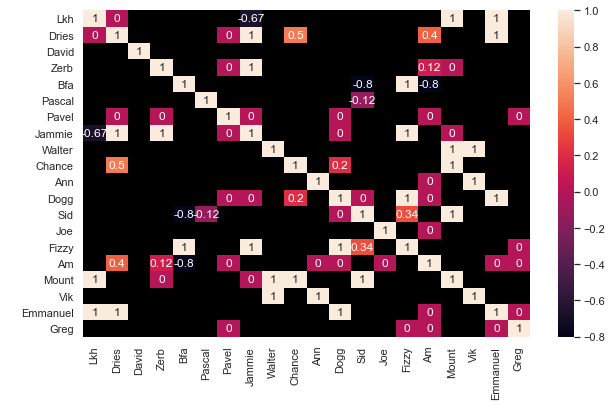

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#corr = pd.read_excel("./corr_file.xlsx")
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
#corr.rename({"Unnamed: 0": " "}, inplace=True, axis=1)
sns.heatmap(corr.set_index(" "), annot=True)
#plt.ylabel("")
plt.show()

In [44]:
[i for i in df.loc[19,:] if i not in ["nan", np.NaN]]

['Greg',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 1.0]

In [45]:
means = [0.44, 0.483, 0, 0.0295, -0.2, -0.125, 0, 0.33, 1, 0.566, 0.5, 0.314, 0.0824, 0, 0.834, -0.031, 0.66, 1, 0.6, 0]

In [46]:
df["Means"] = means

In [49]:
import matplotlib.pyplot as plt

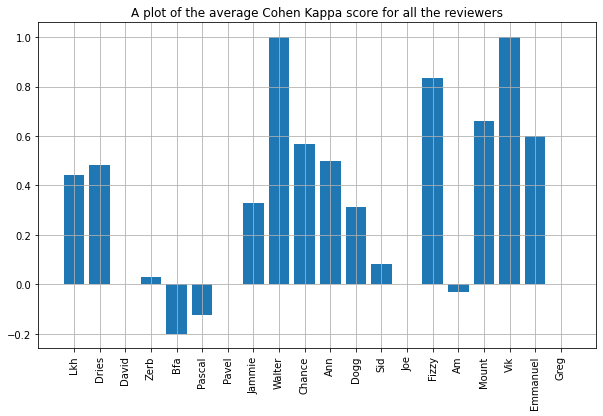

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(df.Names, df.Means);
plt.xticks(rotation=90);
plt.title("A plot of the average Cohen Kappa score for all the reviewers");
plt.grid()

In [57]:
df.to_csv("./averages.csv")

In [62]:
positional = pd.DataFrame()

In [65]:
positional["Names"] = df.sort_values(by="Means", ascending=False)["Names"].values

In [82]:
positional["Means"] = df.sort_values(by="Means", ascending=False)["Means"].values

In [78]:
positional.reset_index(inplace=True)#.

In [80]:
positional.drop("index", axis=1, inplace=True)

In [84]:
[i+1 for i in range(10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [87]:
positional["Positions"] = [i+1 for i in range(20)]

In [90]:
positional = positional[["Names", "Positions", "Means"]]

In [92]:
positional

,Names,Positions,Means
0,Walter,1,1.0000
1,Vik,2,1.0000
2,Fizzy,3,0.8340
3,Mount,4,0.6600
4,Emmanuel,5,0.6000
5,Chance,6,0.5660
6,Ann,7,0.5000
7,Dries,8,0.4830
8,Lkh,9,0.4400
9,Jammie,10,0.3300


In [78]:
means = []
for x in range(dff.shape[0]):
    i_s = [i for i in dff.loc[x,:] if i not in names]
    means.append(sum(i_s)/len(i_s))
    print(sum(i_s)/len(i_s))

0.4666
0.557
1.0
0.4236
0.09999999999999998
0.4375
0.14285714285714285
0.416625
1.0
0.67475
0.6666666666666666
0.399875
0.2353333333333333
0.5
0.7228333333333333
0.0717
0.7142857142857143
1.0
0.6666666666666666
0.2


In [80]:
dff["Means"] = means

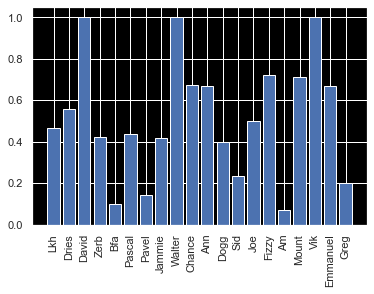

In [85]:
plt.bar(dff[" "], dff["Means"])
plt.xticks(rotation=90);

In [9]:
names = [i for i in df.columns]

In [12]:
names

['Names',
 'Lkh',
 'Dries',
 'David',
 'Zerb',
 'Bfa',
 'Pascal',
 'Pavel',
 'Jammie',
 'Walter',
 'Chance',
 'Ann',
 'Dogg',
 'Sid',
 'Joe',
 'Fizzy',
 'Am',
 'Mount',
 'Vik',
 'Emmanuel',
 'Greg',
 'NaN']

In [11]:
names.append("NaN")

In [36]:
"Lkh" not in ["NaN", "Lkh"]

False

In [12]:
import numpy as np

In [22]:
corr.loc[0, "David"].dtype

dtype('float64')

In [41]:
dff = corr.fillna("NaN")

In [44]:
dff

,,Lkh,Dries,David,Zerb,Bfa,Pascal,Pavel,Jammie,Walter,...,Ann,Dogg,Sid,Joe,Fizzy,Am,Mount,Vik,Emmanuel,Greg
0,Lkh,1.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1,Dries,0.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.399,NaN,NaN,1.0,NaN
2,David,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Zerb,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.118,0.0,NaN,NaN,NaN
4,Bfa,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.8,NaN,1.0,-0.8,NaN,NaN,NaN,NaN
5,Pascal,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,-0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Pavel,NaN,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
7,Jammie,-0.667,1.0,NaN,1.0,NaN,NaN,0.0,1.0,NaN,...,NaN,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
8,Walter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
9,Chance,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.199,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
